In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [8]:
# Inverse transform to original scale (if you scaled data)

df = pd.read_csv('server_metrics.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
features = ['cpu_percent', 'memory_percent', 'disk_io', 'net_io_sent', 'net_io_recv', 'load_avg', 'active_connections']
df = df[features].fillna(method='ffill')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Sequence creation
def create_sequences(data, target_index, window=30):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)

target_index = 0  # cpu_load
X, y = create_sequences(scaled_data, target_index)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

Epoch 1/10


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_51580/765447240.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[features].fillna(method='ffill')
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0180 - val_loss: 0.0148
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0218 - val_loss: 0.0131
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - val_loss: 0.0124
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - val_loss: 0.0128
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - val_loss: 0.0124
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - val_loss: 0.0139
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - val_loss: 0.0129
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0138 - val_loss: 0.0128
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - val_loss: 0.0143
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


ValueError: non-broadcastable output operand with shape (38,1) doesn't match the broadcast shape (38,7)

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_inv[-50:])), y_test_inv[-50:], label='Actual')
plt.plot(range(len(y_pred_inv[-50:])), y_pred_inv[-50:], label='Predicted')
plt.title('📈 LSTM Forecast: Future CPU Usage (Last 50 Timesteps)', fontsize=14)
plt.xlabel('Timestep')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'y_test_inv' is not defined

<Figure size 1200x500 with 0 Axes>

Epoch 1/20


/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1271 
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0836
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0513
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0357
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0264
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0224
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0192
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0226
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0181
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

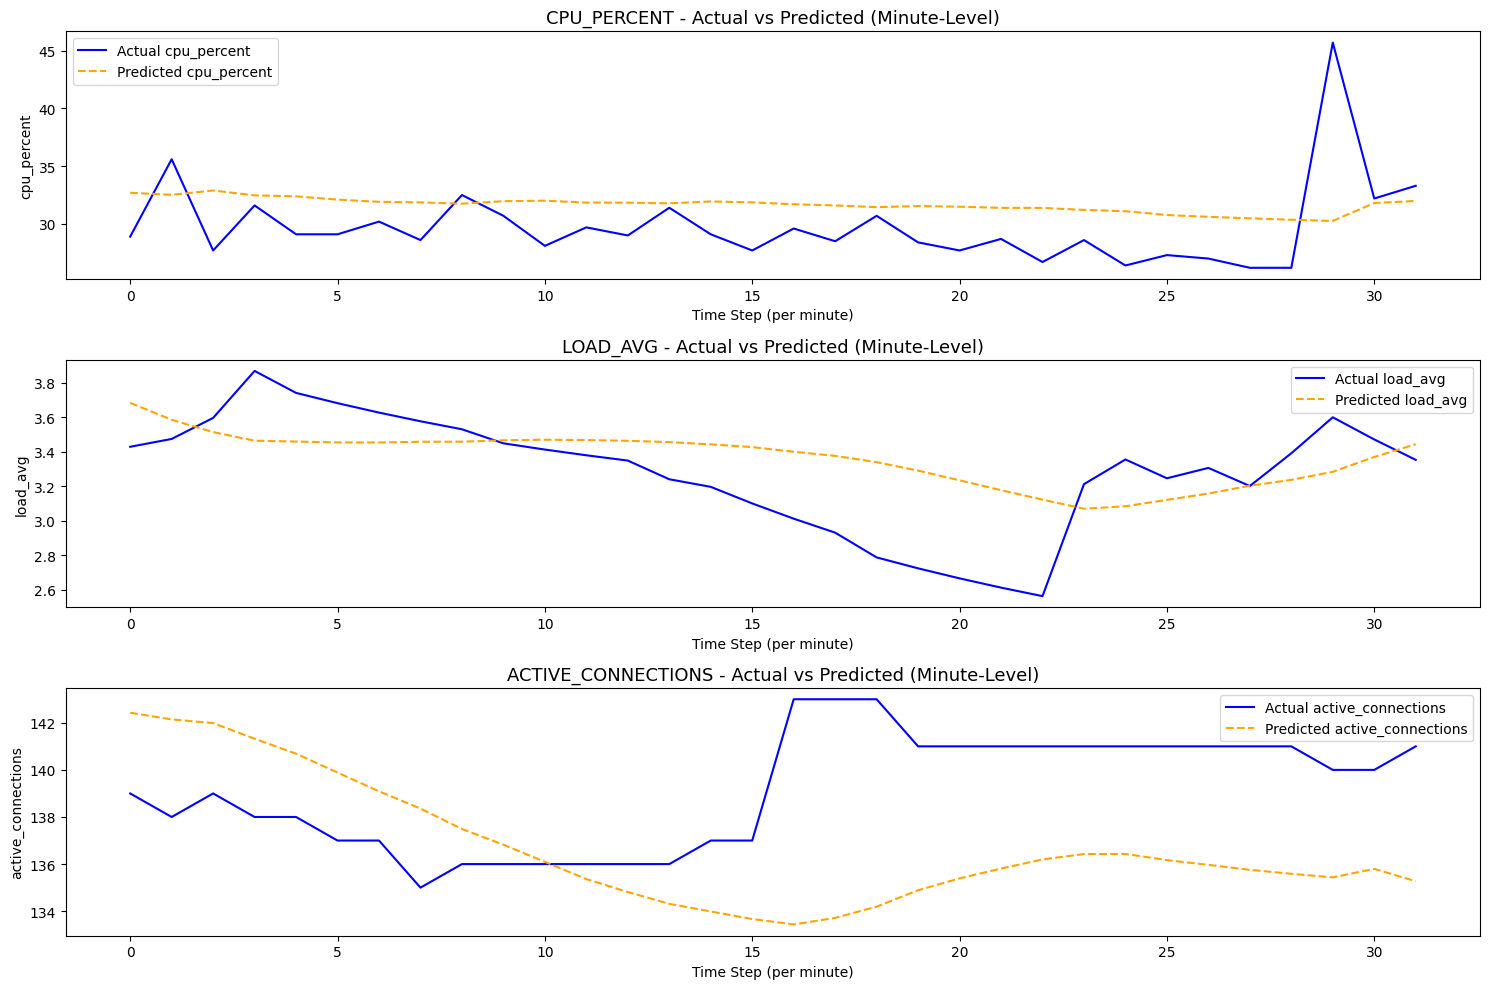

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("server_metrics.csv")  # Replace with actual file
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Select relevant features
features = ['cpu_percent', 'load_avg', 'active_connections']
data = df[features]

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence prep (1-minute interval prediction)
SEQ_LEN = 60  # Look back 60 minutes
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LEN)

# Train/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model definition
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, len(features))),
    Dense(len(features))
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to real values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotting (sexy titles included 😎)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(y_test_inv[:, i], label=f'Actual {feature}', color='blue')
    plt.plot(y_pred_inv[:, i], label=f'Predicted {feature}', color='orange', linestyle='--')
    plt.title(f'{feature.upper()} - Actual vs Predicted (Minute-Level)', fontsize=13)
    plt.xlabel("Time Step (per minute)")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()


In [12]:
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)
print(df.index.to_series().diff().value_counts())

timestamp
0 days 00:00:06    182
0 days 00:00:07     12
0 days 00:00:08      3
0 days 00:00:18      2
0 days 00:00:09      2
0 days 00:00:10      2
0 days 00:00:16      2
0 days 00:05:23      1
0 days 00:00:33      1
0 days 00:00:17      1
0 days 00:06:45      1
0 days 00:01:18      1
0 days 00:00:26      1
0 days 00:00:21      1
0 days 00:01:16      1
0 days 00:00:13      1
0 days 00:00:11      1
Name: count, dtype: int64


Epoch 1/15


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_51580/3185409012.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('10S').mean().interpolate()
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0969 
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301 
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0208 
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0187 
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


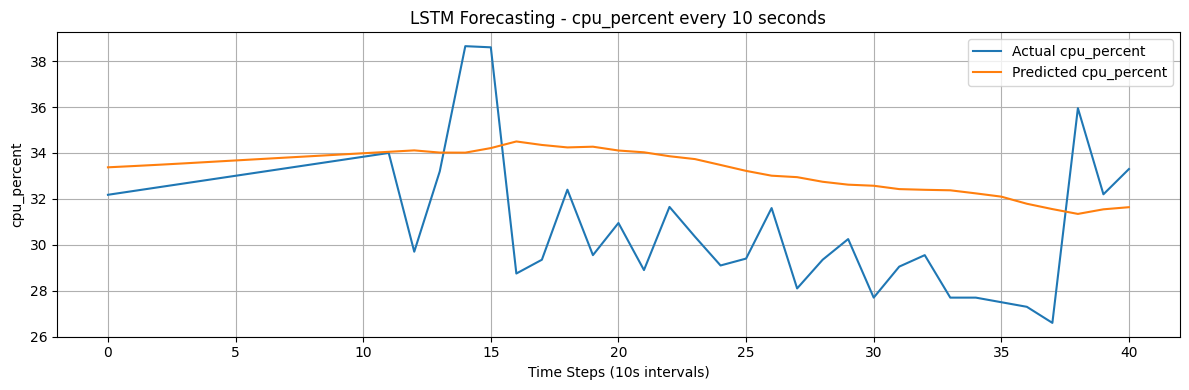

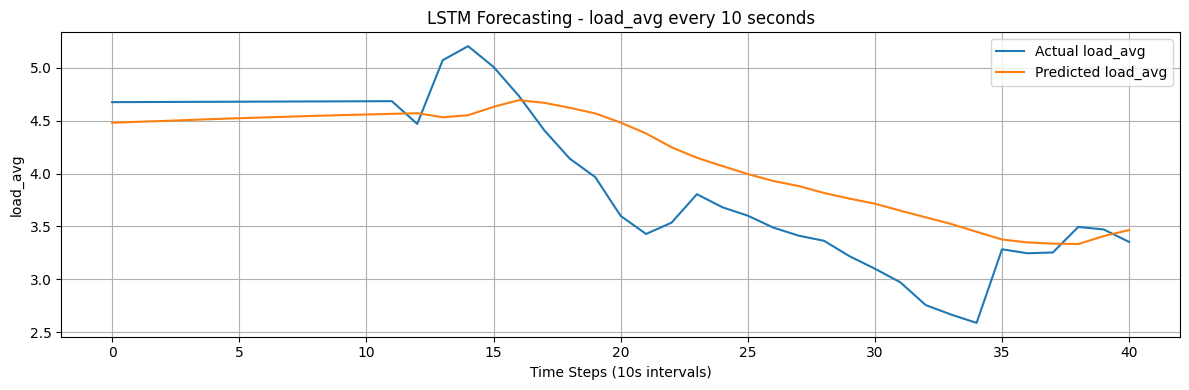

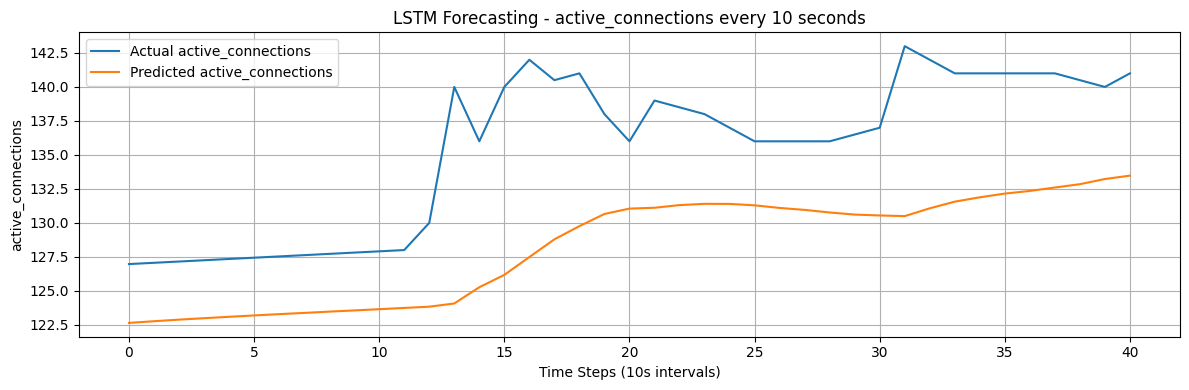

cpu_percent - RMSE: 3.3334, MAE: 2.7886
load_avg - RMSE: 0.4538, MAE: 0.3649
active_connections - RMSE: 7.9116, MAE: 7.2431


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv('server_metrics.csv')  # Replace with your actual filename
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to 10-second intervals and interpolate missing data
df = df.resample('10S').mean().interpolate()

# Select features
features = ['cpu_percent', 'load_avg', 'active_connections']
data = df[features].values

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
SEQ_LEN = 30  # Past 5 minutes of data (30 timesteps * 10s)
X, y = [], []
for i in range(len(data_scaled) - SEQ_LEN):
    X.append(data_scaled[i:i+SEQ_LEN])
    y.append(data_scaled[i+SEQ_LEN])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(0.001), loss='mse')
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotting
for i, feat in enumerate(features):
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv[:, i], label='Actual ' + feat)
    plt.plot(y_pred_inv[:, i], label='Predicted ' + feat)
    plt.title(f"LSTM Forecasting - {feat} every 10 seconds")
    plt.xlabel("Time Steps (10s intervals)")
    plt.ylabel(feat)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation
for i, feat in enumerate(features):
    rmse = np.sqrt(mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i]))
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    print(f"{feat} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")



Training model for: cpu_percent with SEQ_LEN = 30
Epoch 1/15


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_6317/1764131180.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('10S').mean().interpolate()
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0365  
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0172 
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


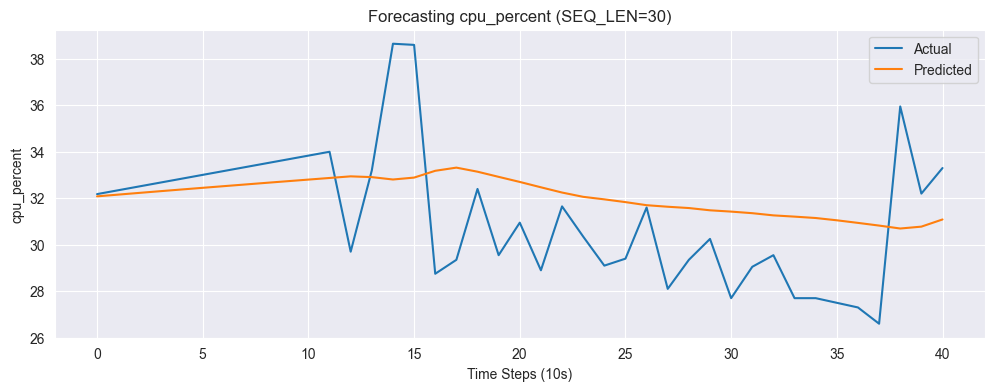


Training model for: load_avg with SEQ_LEN = 30
Epoch 1/15


/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1583  
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0248 
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0246 
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0200
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


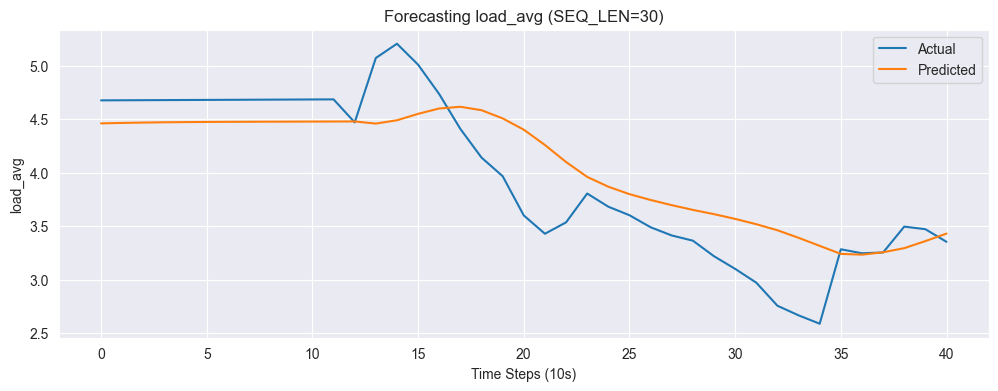


Training model for: active_connections with SEQ_LEN = 90
Epoch 1/15


/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0301
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0058
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0062
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0059
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0049
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0048
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0050
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0038
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0053
Epoch 14/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0038
Epoch 15/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


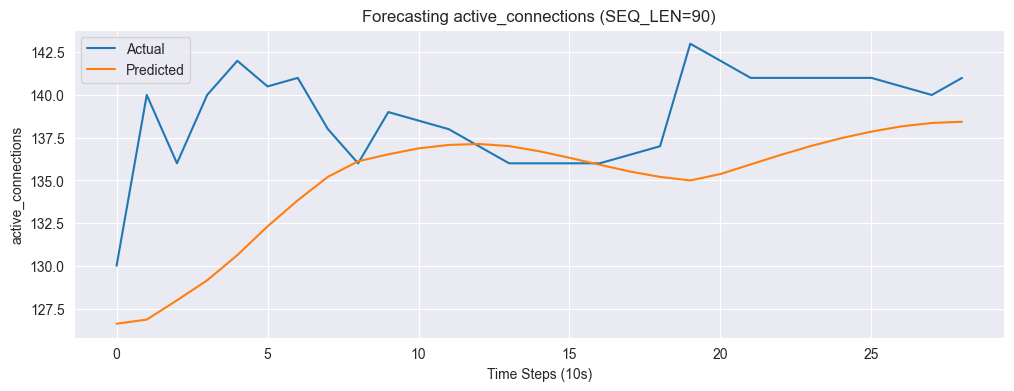


📊 Evaluation Summary:
cpu_percent — MAE: 2.1928, RMSE: 2.7365
load_avg — MAE: 0.3219, RMSE: 0.3962
active_connections — MAE: 4.0168, RMSE: 5.3952


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('server_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to 10 second intervals and interpolate
df = df.resample('10S').mean().interpolate()

# Define targets and corresponding SEQ_LENs
targets = {
    'cpu_percent': 30,
    'load_avg': 30,
    'active_connections': 90
}

results = {}

for feature, SEQ_LEN in targets.items():
    print(f"\nTraining model for: {feature} with SEQ_LEN = {SEQ_LEN}")

    data = df[[feature]].values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data_scaled) - SEQ_LEN):
        X.append(data_scaled[i:i+SEQ_LEN])
        y.append(data_scaled[i+SEQ_LEN])
    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(64, input_shape=(SEQ_LEN, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv, label='Actual')
    plt.plot(y_pred_inv, label='Predicted')
    plt.title(f"Forecasting {feature} (SEQ_LEN={SEQ_LEN})")
    plt.xlabel("Time Steps (10s)")
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluation
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    results[feature] = (mae, rmse)

# Print evaluation summary
print("\n📊 Evaluation Summary:")
for feat, (mae, rmse) in results.items():
    print(f"{feat} — MAE: {mae:.4f}, RMSE: {rmse:.4f}")
